In [27]:
# Import pandas for data handling (CSV reading, DataFrame operations)
import pandas as pd

# Import matplotlib for plotting graphs/visualizations
import matplotlib.pyplot as plt

# Import clustering algorithms: KMeans and DBSCAN
from sklearn.cluster import KMeans, DBSCAN

# Import StandardScaler to normalize/scale features before clustering
from sklearn.preprocessing import StandardScaler


In [28]:
# Load dataset
df=pd.read_csv("Mall_Customers.csv")
# Select features for clustering (2D for easy visualization)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

[269981.28, 183653.32894736843, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 36667.79681776557, 25044.967764018933, 23825.872991480457, 20631.08970326364]


Text(0, 0.5, 'Wcss')

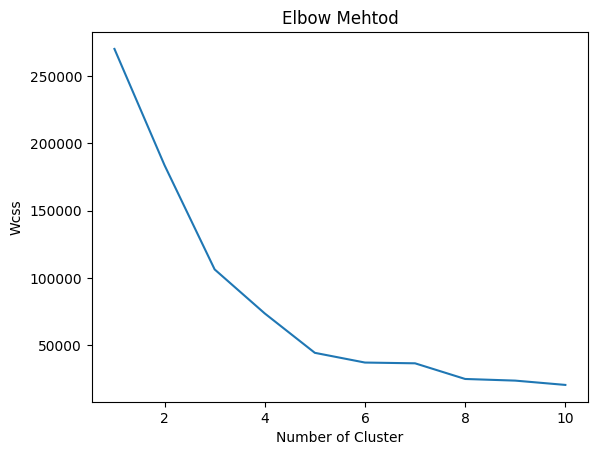

In [29]:
# List to store Within-Cluster Sum of Squares (WCSS) for different cluster counts
Wcss=[]
# Run KMeans for cluster numbers 1 to 10
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")# k-means++ for better centroid init
    kmeans.fit(X)# Fit model to data
    Wcss.append(kmeans.inertia_)# Save WCSS (inertia) value

# Print WCSS values
print(Wcss)
# Plot elbow method graph to find optimal cluster number
plt.plot(range(1,11),Wcss)
plt.title("Elbow Mehtod")
plt.xlabel("Number of Cluster")
plt.ylabel("Wcss")



In [30]:
# Create KMeans model with 5 clusters using k-means++ initialization
kmeans=KMeans(n_clusters=5,init="k-means++")
# Fit the model and get predicted cluster labels for each data point
y_kmeans=kmeans.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

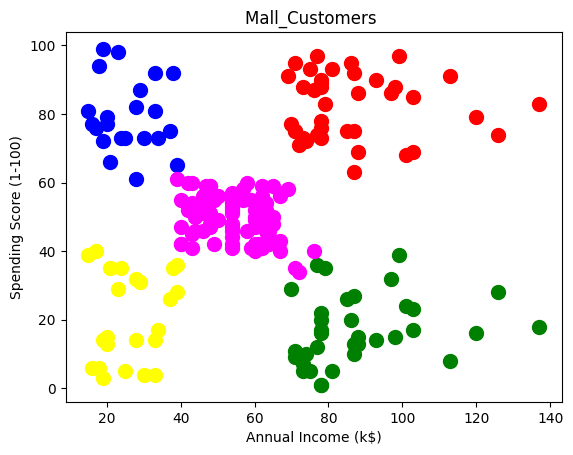

In [31]:
# Plot data points for each KMeans cluster with different colors
plt.scatter(X.values[y_kmeans == 0,0],X.values[y_kmeans == 0,1],s=100,c="red",label="Cluster 1")
plt.scatter(X.values[y_kmeans == 1,0],X.values[y_kmeans == 1,1],s=100,c="green",label="Cluster 2")
plt.scatter(X.values[y_kmeans == 2,0],X.values[y_kmeans == 2,1],s=100,c="blue",label="Cluster 3")
plt.scatter(X.values[y_kmeans == 3,0],X.values[y_kmeans == 3,1],s=100,c="magenta",label="Cluster 4")
plt.scatter(X.values[y_kmeans == 4,0],X.values[y_kmeans == 4,1],s=100,c="yellow",label="Cluster 5")
# Add title and axis labels
plt.title("Mall_Customers ")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [32]:
# Initialize StandardScaler to normalize features
scaler=StandardScaler()
# Fit the scaler to X and transform it to scaled values (mean=0, std=1)
X_scaler=scaler.fit_transform(X)

In [33]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
y_dbscan=dbscan.fit_predict(X_scaler)

Text(0, 0.5, 'Spending Score (1-100)')

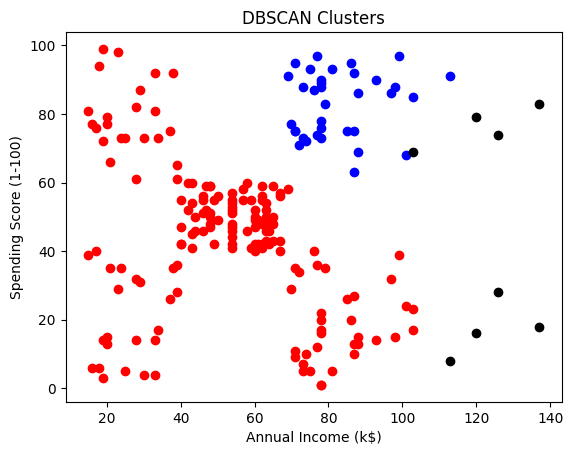

In [34]:
# Plot DBSCAN clusters (different colors for each cluster, black for noise)
plt.scatter(X.values[y_dbscan == 0, 0], X.values[y_dbscan == 0, 1], c='red', label='Cluster 1')
plt.scatter(X.values[y_dbscan == 1, 0], X.values[y_dbscan == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X.values[y_dbscan == 2, 0], X.values[y_dbscan == 2, 1], c='yellow', label='Cluster 2')
plt.scatter(X.values[y_dbscan == -1, 0], X.values[y_dbscan == -1, 1], c='black', label='Noise')
# Add title and axis labels
plt.title('DBSCAN Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
